In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_project_3_test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_project_3_train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df_train = df_train[['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual', 'SalePrice']]

In [5]:
df_test = df_test[['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual']]

In [6]:
df_train.describe()

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,6.099315,5.575342,1515.463699,472.980137,180921.195890
std,9981.264932,30.202904,1.382997,1.112799,525.480383,213.804841,79442.502883
min,1300.000000,1872.000000,1.000000,1.000000,334.000000,0.000000,34900.000000
25%,7553.500000,1954.000000,5.000000,5.000000,1129.500000,334.500000,129975.000000
50%,9478.500000,1973.000000,6.000000,5.000000,1464.000000,480.000000,163000.000000
75%,11601.500000,2000.000000,7.000000,6.000000,1776.750000,576.000000,214000.000000
max,215245.000000,2010.000000,10.000000,9.000000,5642.000000,1418.000000,755000.000000


<Axes: xlabel='SalePrice', ylabel='Count'>

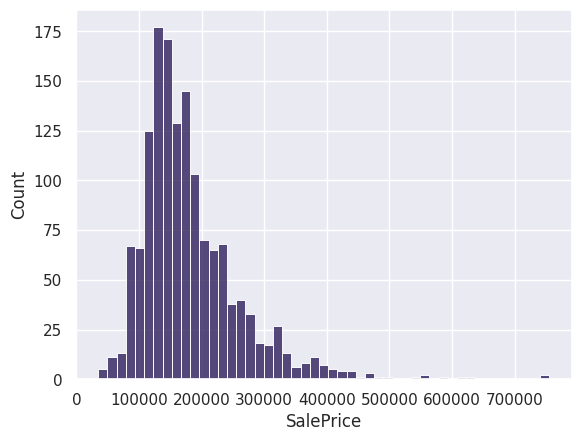

In [7]:
sns.set_theme(palette = 'magma')
sns.histplot(df_train['SalePrice'])

In [8]:
print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

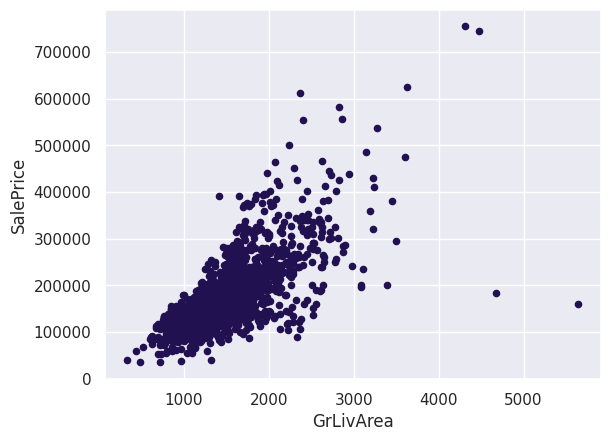

In [9]:
df_train.plot.scatter(x='GrLivArea', y='SalePrice')

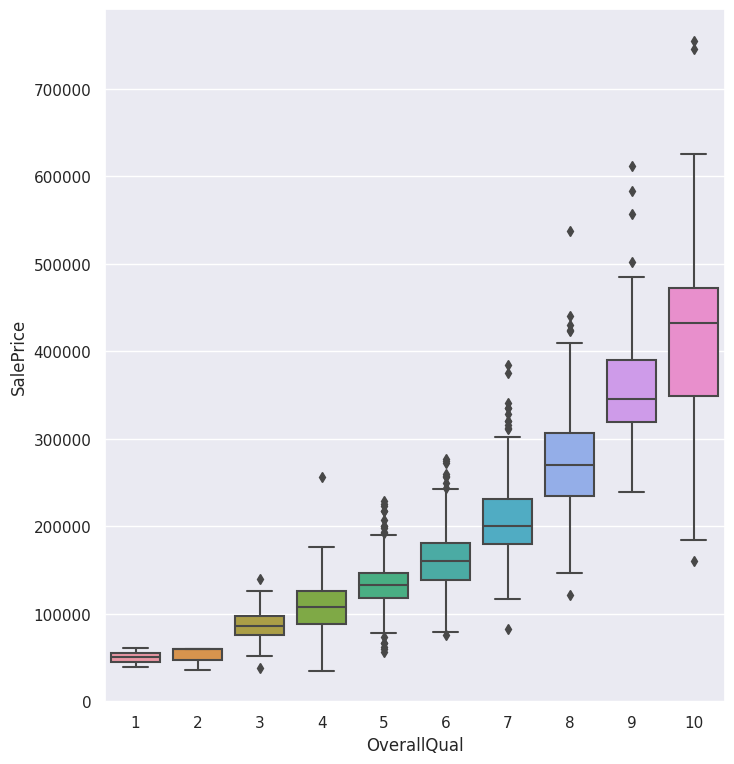

In [10]:
data =pd.concat([df_train['SalePrice'], df_train ['OverallQual']], axis =1)
f ,ax = plt.subplots(figsize = (8,9))
fig = sns.boxplot(x ='OverallQual', y='SalePrice', data=data)

In [11]:
df_train[(df_train['OverallQual'] == 10)& (df_train['SalePrice']< 200000)]

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
523,40094,2007,10,5,4676,NaN,884,Ex,184750
1298,63887,2008,10,5,5642,NaN,1418,Ex,160000


In [12]:
df_train['YearBuilt'].max()

2010

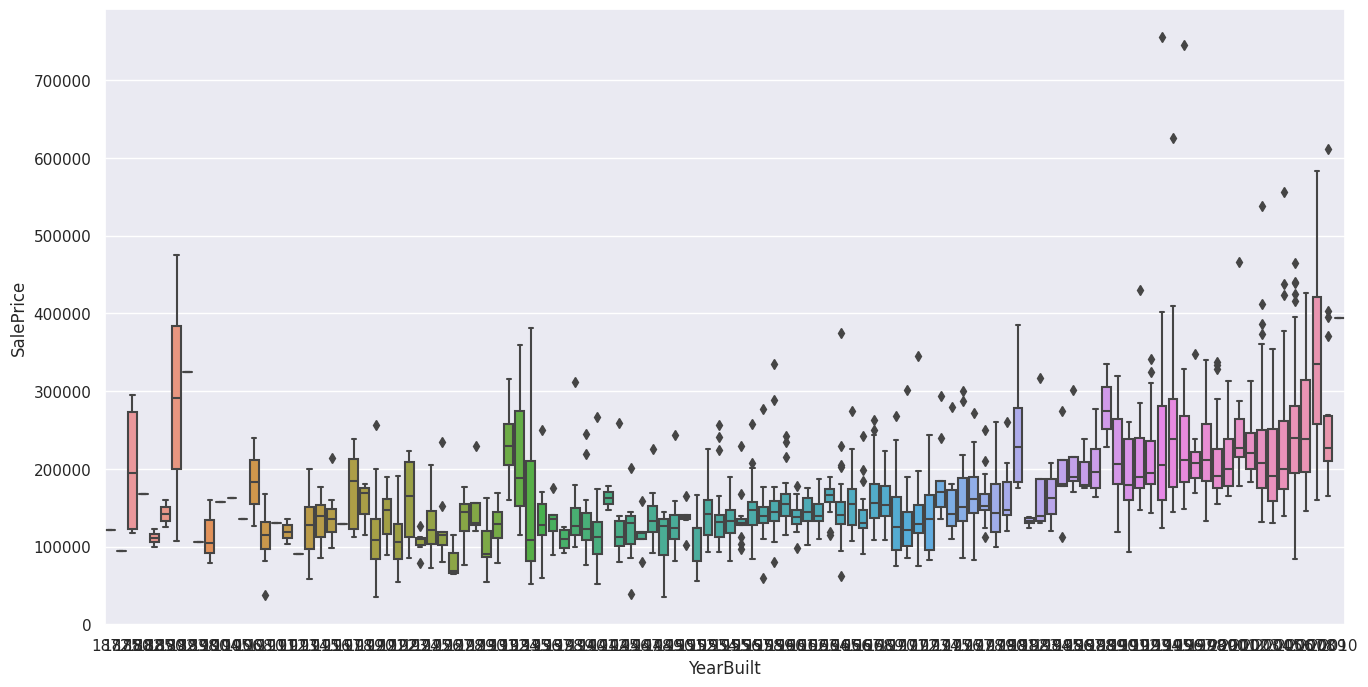

In [13]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis = 1)
f, ax = plt.subplots(figsize = (16 ,8))
fig = sns.boxplot(x ="YearBuilt", y = "SalePrice", data=data)


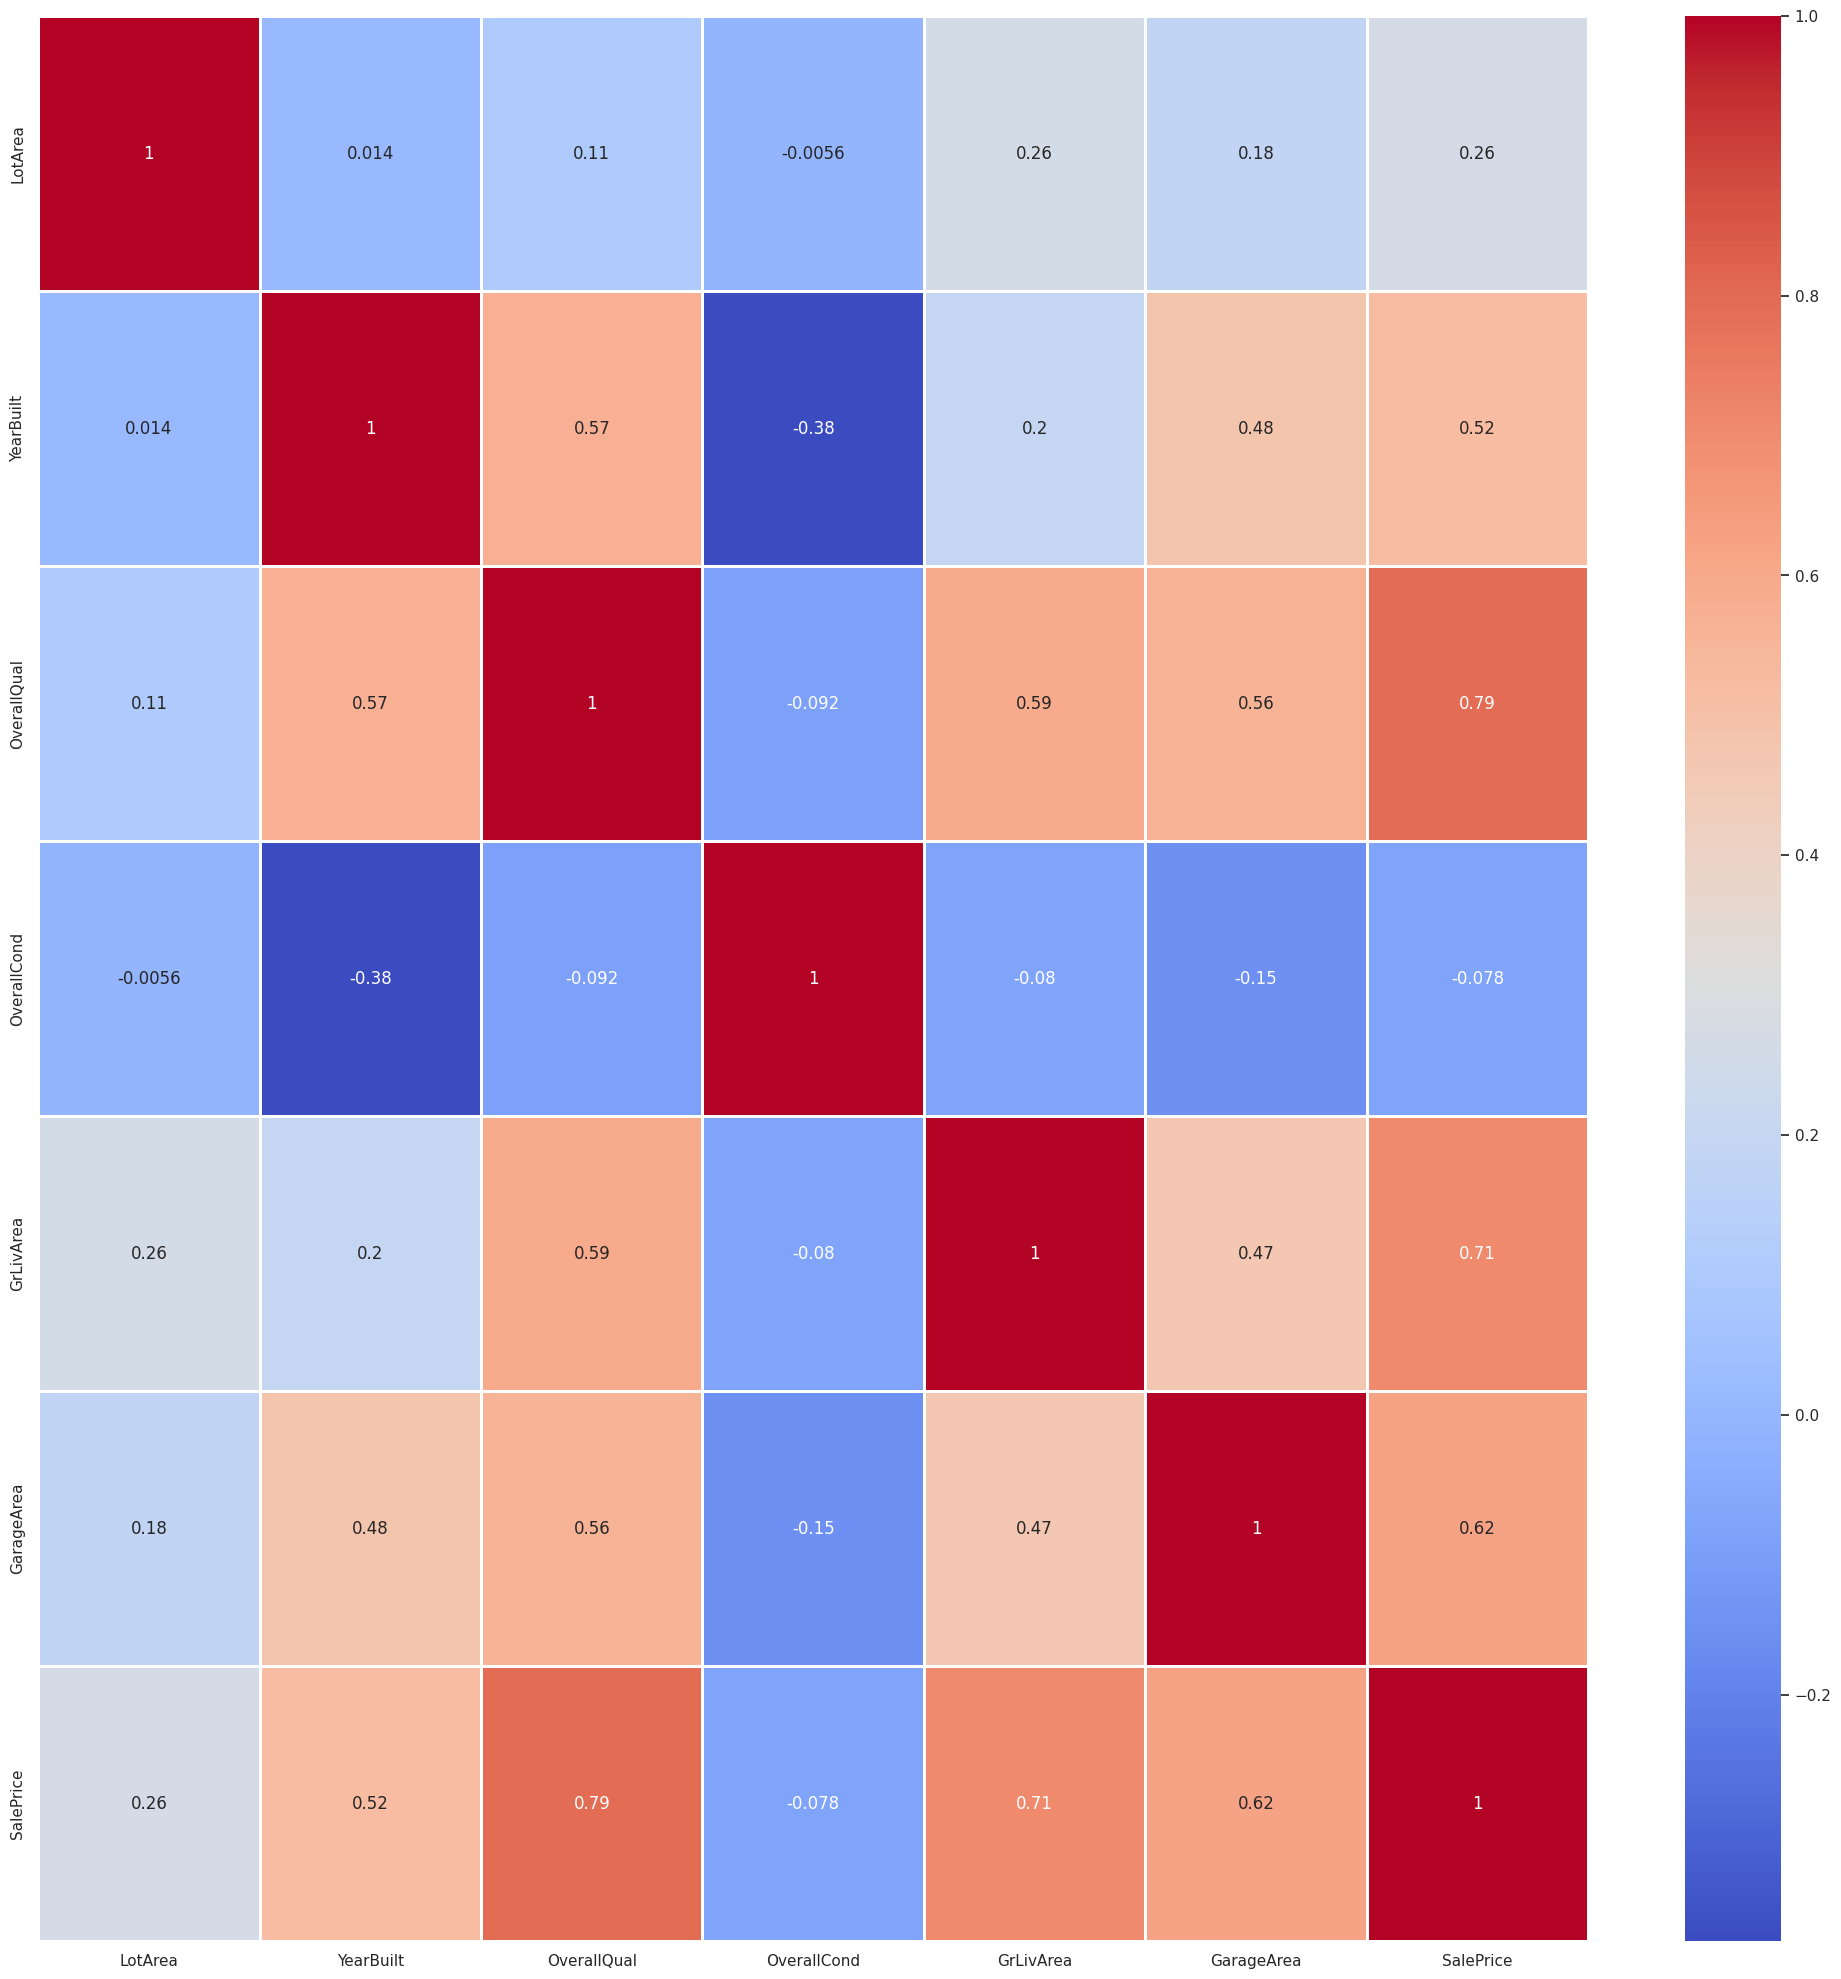

In [14]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(df_train.corr(), cmap = 'coolwarm', annot=True, linewidth=2)

In [15]:
hig_corr = df_train.corr()
hig_corr['SalePrice']

LotArea        0.263843
YearBuilt      0.522897
OverallQual    0.790982
OverallCond   -0.077856
GrLivArea      0.708624
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

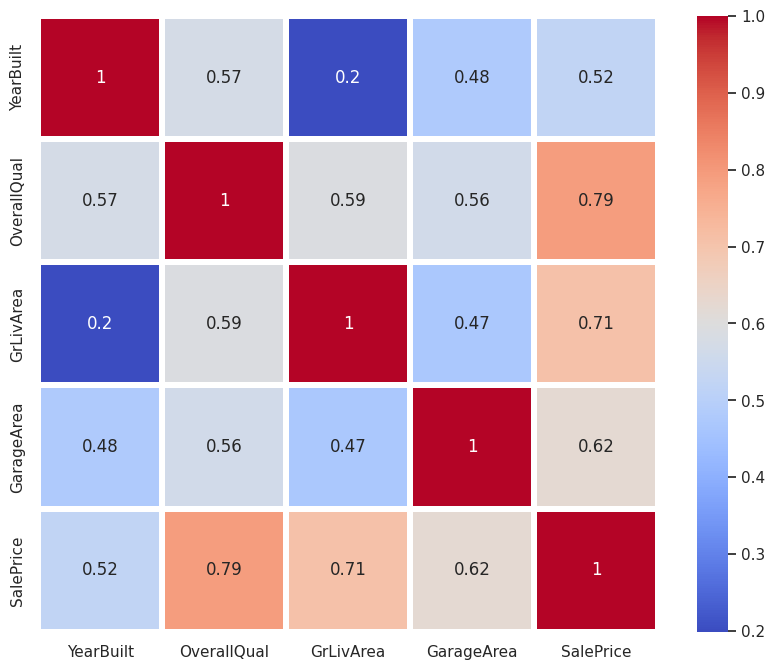

In [16]:
hig_corr_feature = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]
plt.figure(figsize =(10,8))
ax = sns.heatmap(df_train[hig_corr_feature].corr(), cmap = 'coolwarm', annot=True, linewidth = 3)

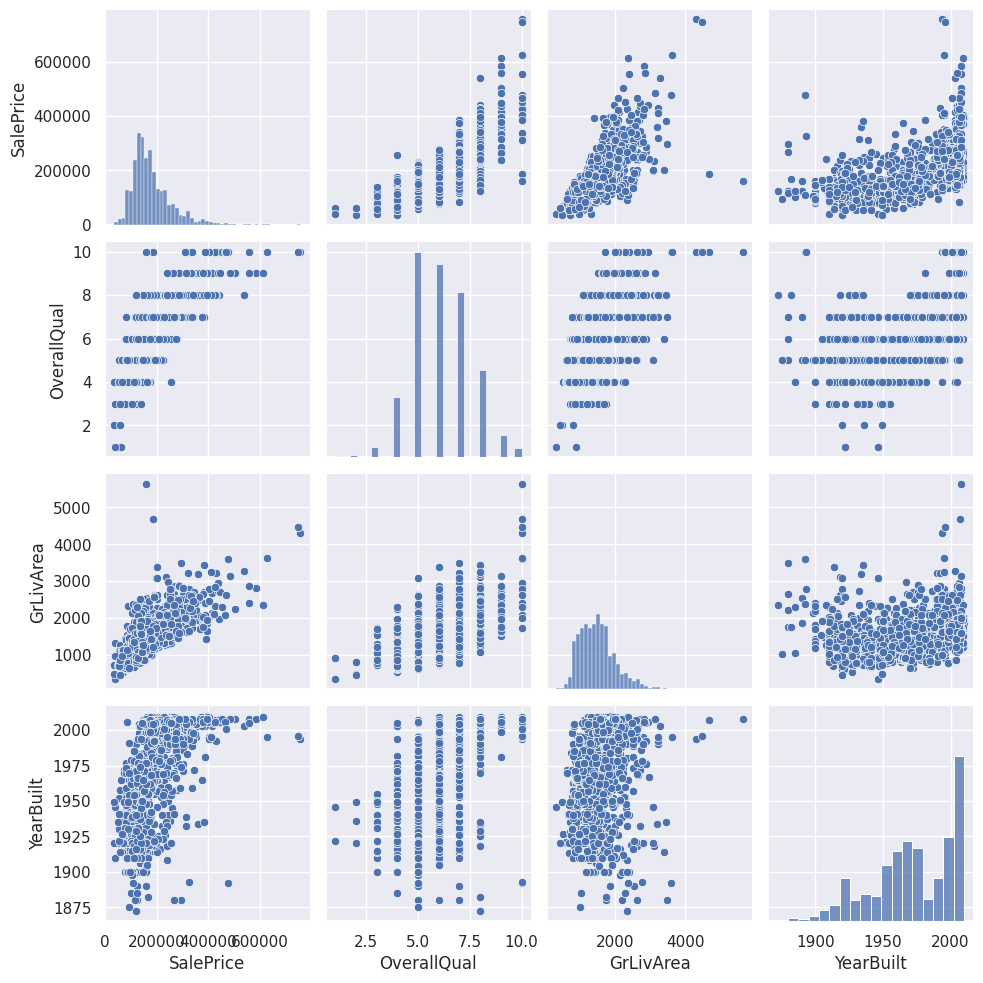

In [17]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

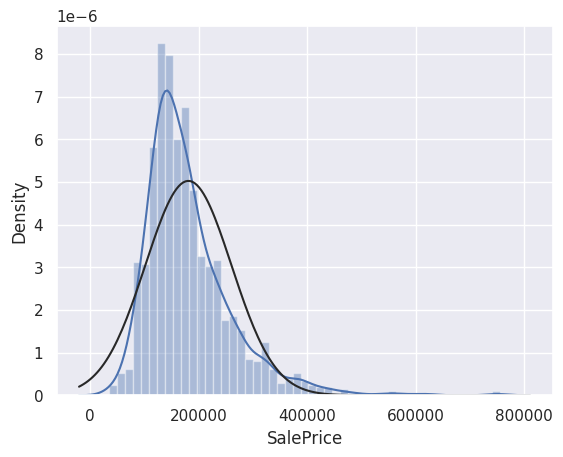

In [18]:
sns.distplot(df_train['SalePrice'], fit = norm);


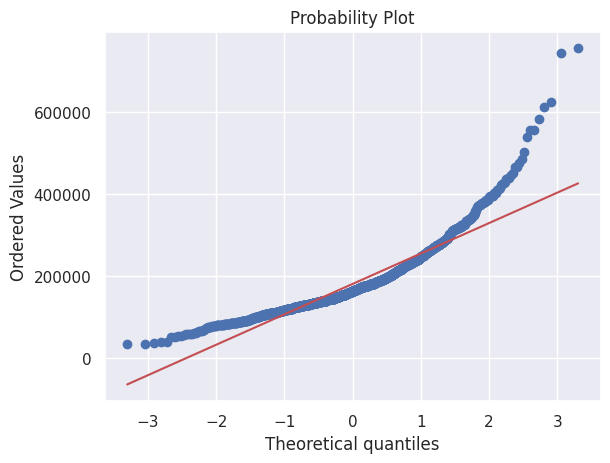

In [19]:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [20]:
np.log1p(755000)

13.534474352733596

In [21]:
df_train_tf = df_train.copy()
df_train_tf["SalesPrice"] = np.log1p(df_train['SalePrice'])

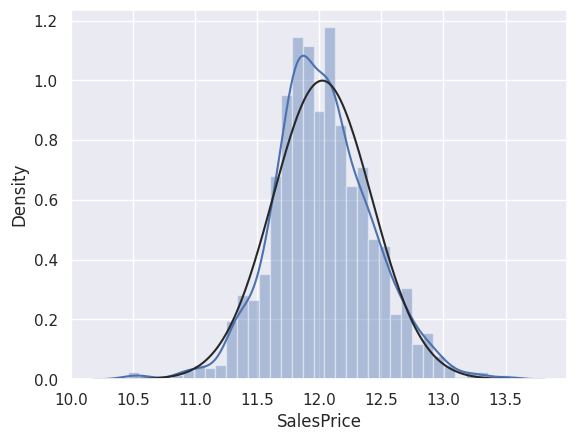

In [22]:
sns.distplot(df_train_tf['SalesPrice'], fit =norm);

In [23]:
df_train_tf['SalesPrice'].describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalesPrice, dtype: float64

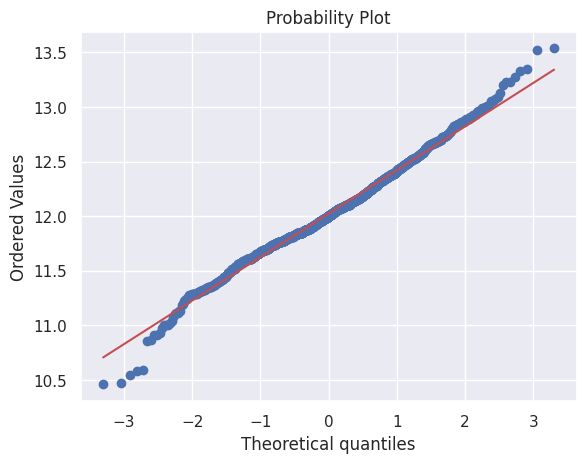

In [24]:
fig = plt.figure()
res = stats.probplot(df_train_tf['SalesPrice'], plot = plt)
plt.show()

In [25]:
ntrain = df_train_tf.shape[0]
ntest = df_test.shape[0]
y_train = df_train_tf.SalesPrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis = 1, inplace=True)
print("All_data size is : {}".format (all_data.shape))

All_data size is : (2919, 8)


In [26]:
print(ntrain, ntest)


1460 1459


In [27]:
total = all_data.isnull().sum().sort_values(ascending = False)
percent = (all_data.isnull().sum()/all_data.isnull().count()* 100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys=['Total','Percent'])
missing_data

,Total,Percent
MiscFeature,2814,96.402878
GarageArea,1,0.034258
KitchenQual,1,0.034258
LotArea,0,0.000000
YearBuilt,0,0.000000
OverallQual,0,0.000000
OverallCond,0,0.000000
GrLivArea,0,0.000000


In [28]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [29]:
all_data['MiscFeature'].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [30]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

In [31]:
all_data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [32]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [33]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [34]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2919 non-null   int64  
 1   YearBuilt    2919 non-null   int64  
 2   OverallQual  2919 non-null   int64  
 3   OverallCond  2919 non-null   int64  
 4   GrLivArea    2919 non-null   int64  
 5   MiscFeature  2919 non-null   object 
 6   GarageArea   2919 non-null   float64
 7   KitchenQual  2919 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 182.6+ KB


In [35]:
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [36]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


In [37]:
tmp_data = all_data.copy()

In [38]:
from sklearn.preprocessing import LabelEncoder
cols = ('OverallQual', 'OverallCond', 'KitchenQual')
encoders = {}
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(tmp_data[c].values))
    tmp_data[c] = lbl.transform(list(tmp_data[c].values))
    encoders[c] = lbl
print('Shape tmp_data: {}'.format(tmp_data.shape))

Shape tmp_data: (2919, 8)


In [39]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,4,1710,None,548.0,2
1,9600,1976,6,7,1262,None,460.0,3
2,11250,2001,7,4,1786,None,608.0,2
3,9550,1915,7,4,1717,None,642.0,2
4,14260,2000,8,4,2198,None,836.0,2
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,6,1092,None,0.0,3
2915,1894,1970,4,4,1092,None,286.0,3
2916,20000,1960,5,6,1224,None,576.0,3
2917,10441,1992,5,4,970,Shed,0.0,3


In [40]:
from scipy.stats import norm, skew

numeric_feats = tmp_data.dtypes[tmp_data.dtypes != "object"].index

skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkewness in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skewness in numerical features: 



,Skew
LotArea,12.822431
GrLivArea,1.269358
OverallCond,0.570312
GarageArea,0.239257
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-1.448023


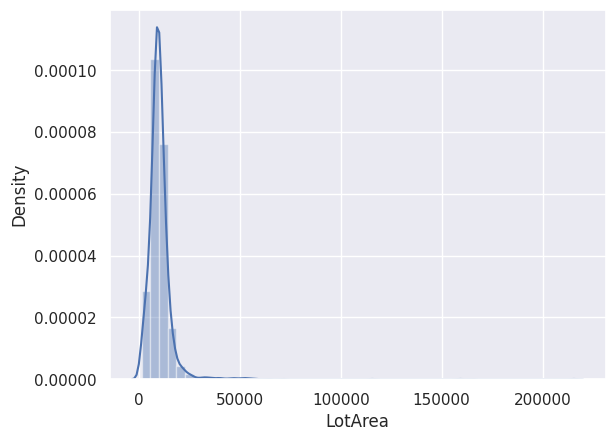

In [41]:
sns.distplot(tmp_data['LotArea']);

In [42]:
tmp_data['LotArea'].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

In [43]:
skewness = skewness[abs(skewness['Skew']) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 3 skewed numerical features to Box Cox transform


In [44]:
skewness.index.tolist()

['LotArea', 'GrLivArea', 'KitchenQual']

In [45]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.20
for feat in skewed_features:
    tmp_data[feat] = boxcox1p(tmp_data[feat], lam)

In [46]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,25.503637,2003,7,4,17.162564,None,548.0,1.228655
1,26.291998,1976,6,7,15.856944,None,460.0,1.597540
2,27.300424,2001,7,4,17.356042,None,608.0,1.228655
3,26.259338,1915,7,4,17.180669,None,642.0,1.228655
4,28.868815,2000,8,4,18.303173,None,836.0,1.228655
...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,15.262547,None,0.0,1.597540
2915,17.619961,1970,4,4,15.262547,None,286.0,1.597540
2916,31.239346,1960,5,6,15.729901,None,576.0,1.597540
2917,26.821947,1992,5,4,14.788544,Shed,0.0,1.597540


In [47]:
skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
OverallCond,0.570312
LotArea,0.496692
GarageArea,0.239257
GrLivArea,0.230000
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-2.156088


<Axes: xlabel='GrLivArea', ylabel='Density'>

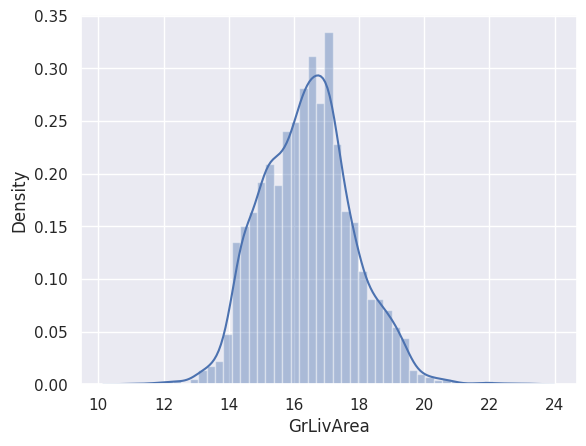

In [48]:
sns.distplot(tmp_data['GrLivArea'])

In [49]:
tmp_data['MiscFeature'].unique()

array(['None', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [50]:
tmp_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      2919 non-null   float64
 1   YearBuilt    2919 non-null   int64  
 2   OverallQual  2919 non-null   int64  
 3   OverallCond  2919 non-null   int64  
 4   GrLivArea    2919 non-null   float64
 5   MiscFeature  2919 non-null   object 
 6   GarageArea   2919 non-null   float64
 7   KitchenQual  2919 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 182.6+ KB


In [51]:
tmp_data = pd.get_dummies(tmp_data, drop_first=True)
print(tmp_data.shape)

(2919, 11)


In [52]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,25.503637,2003,7,4,17.162564,548.0,1.228655,1,0,0,0
1,26.291998,1976,6,7,15.856944,460.0,1.597540,1,0,0,0
2,27.300424,2001,7,4,17.356042,608.0,1.228655,1,0,0,0
3,26.259338,1915,7,4,17.180669,642.0,1.228655,1,0,0,0
4,28.868815,2000,8,4,18.303173,836.0,1.228655,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,15.262547,0.0,1.597540,1,0,0,0
2915,17.619961,1970,4,4,15.262547,286.0,1.597540,1,0,0,0
2916,31.239346,1960,5,6,15.729901,576.0,1.597540,1,0,0,0
2917,26.821947,1992,5,4,14.788544,0.0,1.597540,0,0,1,0


In [53]:
one_hot_columns = tmp_data.columns

In [54]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(tmp_data)
tmp_data = scaler.transform(tmp_data)

In [55]:
pd.DataFrame(tmp_data)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.254874,0.631579,0.5,0.0,0.395595,0.265625,-1.0,0.0,0.0,0.0,0.0
1,0.035514,0.063158,0.0,3.0,-0.305745,-0.078125,0.0,0.0,0.0,0.0,0.0
2,0.406961,0.589474,0.5,0.0,0.499525,0.500000,-1.0,0.0,0.0,0.0,0.0
3,0.023483,-1.221053,0.5,0.0,0.405320,0.632812,-1.0,0.0,0.0,0.0,0.0
4,0.984668,0.568421,1.0,0.0,1.008295,1.390625,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.122167,-0.063158,-1.0,2.0,-0.625037,-1.875000,0.0,0.0,0.0,0.0,0.0
2915,-3.158777,-0.063158,-1.0,0.0,-0.625037,-0.757812,0.0,0.0,0.0,0.0,0.0
2916,1.857838,-0.273684,-0.5,2.0,-0.373989,0.375000,0.0,0.0,0.0,0.0,0.0
2917,0.230717,0.400000,-0.5,0.0,-0.879657,-1.875000,0.0,-1.0,0.0,1.0,0.0


In [56]:
X_train = tmp_data[:ntrain]
X_test = tmp_data[ntrain:]

X_train.shape, X_test.shape, y_train.shape

((1460, 11), (1459, 11), (1460,))

In [57]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)

    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [58]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.8273595400084589]

In [59]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.828304803043606]

In [60]:
from sklearn.svm import SVR
svr_reg = SVR(kernel= 'rbf')
test_model(svr_reg)

[0.8358821248717199]

In [61]:
!pip install --upgrade xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.1
    Uninstalling xgboost-2.0.1:
      Successfully uninstalled xgboost-2.0.1


In [62]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg)

[0.8098749535594161]

In [63]:
  all_data

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,None,548.0,Gd
1,9600,1976,6,8,1262,None,460.0,TA
2,11250,2001,7,5,1786,None,608.0,Gd
3,9550,1915,7,5,1717,None,642.0,Gd
4,14260,2000,8,5,2198,None,836.0,Gd
...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,1092,None,0.0,TA
2915,1894,1970,4,5,1092,None,286.0,TA
2916,20000,1960,5,7,1224,None,576.0,TA
2917,10441,1992,5,5,970,Shed,0.0,TA


In [64]:
model = svr_reg.fit(X_train, y_train)

In [65]:
pd.DataFrame(tmp_data)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.254874,0.631579,0.5,0.0,0.395595,0.265625,-1.0,0.0,0.0,0.0,0.0
1,0.035514,0.063158,0.0,3.0,-0.305745,-0.078125,0.0,0.0,0.0,0.0,0.0
2,0.406961,0.589474,0.5,0.0,0.499525,0.500000,-1.0,0.0,0.0,0.0,0.0
3,0.023483,-1.221053,0.5,0.0,0.405320,0.632812,-1.0,0.0,0.0,0.0,0.0
4,0.984668,0.568421,1.0,0.0,1.008295,1.390625,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.122167,-0.063158,-1.0,2.0,-0.625037,-1.875000,0.0,0.0,0.0,0.0,0.0
2915,-3.158777,-0.063158,-1.0,0.0,-0.625037,-0.757812,0.0,0.0,0.0,0.0,0.0
2916,1.857838,-0.273684,-0.5,2.0,-0.373989,0.375000,0.0,0.0,0.0,0.0,0.0
2917,0.230717,0.400000,-0.5,0.0,-0.879657,-1.875000,0.0,-1.0,0.0,1.0,0.0


In [66]:
tmp_data[0].reshape(1,-1)

array([[-0.25487439,  0.63157895,  0.5       ,  0.        ,  0.39559454,
         0.265625  , -1.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [67]:
model.predict(tmp_data[0].reshape(1,-1))

array([12.25771747])

In [68]:
np.expm1(12.247966)

208555.6529293021

In [69]:
np.expm1(y_train[0])

208499.99999999983

In [70]:
data_baru = {'LotArea': [8000],
             'YearBuilt':[2010],
             'OverallQual':['8'],
             'OverallCond':['7'],
             'GrLivArea':[2000],
            'MiscFeature':['None'],
             'GarageArea': [500],
             'KitchenQual': ['TA']}

In [71]:
tmp = pd.DataFrame(data_baru)

In [72]:
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8000,2010,8,7,2000,None,500,TA


In [73]:
data_baru_tf = data_baru.copy()

In [74]:
data_baru_tf['OverallQual'] = encoders['OverallQual'].transform(tmp['OverallQual'])[0]
data_baru_tf['OverallCond'] = encoders['OverallCond'].transform(tmp['OverallCond'])[0]
data_baru_tf['KitchenQual'] = encoders['KitchenQual'].transform(tmp['KitchenQual'])[0]

In [75]:
data_baru_tf['LotArea'] = boxcox1p(tmp['LotArea'], lam)[0]
data_baru_tf['GrLivArea'] = boxcox1p(tmp['GrLivArea'], lam)[0]
data_baru_tf['KitchenQual'] = boxcox1p(data_baru_tf['KitchenQual'], lam)

In [76]:
tmp = pd.DataFrame(data_baru_tf)

In [77]:
tmp = pd.get_dummies(tmp, columns = ['MiscFeature'])

In [78]:
one_hot_columns

Index(['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'GrLivArea',
       'GarageArea', 'KitchenQual', 'MiscFeature_None', 'MiscFeature_Othr',
       'MiscFeature_Shed', 'MiscFeature_TenC'],
      dtype='object')

In [79]:
for kolom in one_hot_columns:
    if kolom not in tmp.columns:
        tmp[kolom] = 0

In [80]:
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,KitchenQual,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,25.171636,2010,8,6,17.867539,500,1.59754,1,0,0,0


In [81]:
tmp_scaled = scaler.transform(tmp.loc[0].values.reshape(1,-1))

In [82]:
y = np.expm1(model.predict(tmp_scaled))
print(y)

[228095.39047813]


In [85]:
pd.DataFrame(data_baru)

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8000,2010,8,7,2000,None,500,TA
